In [2]:
from load_data import load_my_data

int64
(70000, 28, 28)


In [3]:
X_train, X_test, y_train, y_test = load_my_data()

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
type(X_train)

numpy.ndarray

In [6]:
y_train

64334    3
4550     2
24098    2
34222    1
36016    2
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: class, Length: 46900, dtype: int64

In [7]:
y_train.dtype

dtype('int64')

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    # Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

c:\Users\vedes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7086 - loss: 8.2247 - val_accuracy: 0.8264 - val_loss: 0.6831
Epoch 2/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8604 - loss: 0.5806 - val_accuracy: 0.8884 - val_loss: 0.5183
Epoch 3/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9021 - loss: 0.3870 - val_accuracy: 0.9076 - val_loss: 0.3551
Epoch 4/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9187 - loss: 0.3053 - val_accuracy: 0.9121 - val_loss: 0.3405
Epoch 5/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.2704 - val_accuracy: 0.9185 - val_loss: 0.3195
Epoch 6/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9296 - loss: 0.2595 - val_accuracy: 0.9136 - val_loss: 0.3345
Epoch 7/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9334 - loss: 0.2403 - val_accuracy: 0.9301 - val_loss: 0.2909
Epoch 8/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9379 - loss: 0.2236 - 

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9331 - loss: 0.2862
Test Accuracy: 0.9332900643348694


722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step


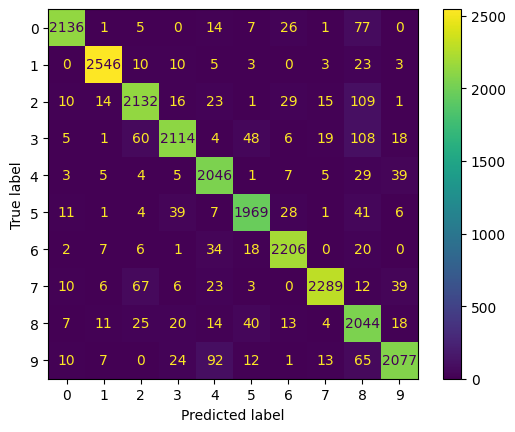

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test).argmax(axis=1)  # Predictions
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2267
           1       0.99      0.98      0.98      2603
           2       0.95      0.97      0.96      2350
           3       0.96      0.96      0.96      2383
           4       0.98      0.97      0.97      2144
           5       0.97      0.96      0.97      2107
           6       0.96      0.99      0.98      2294
           7       0.98      0.97      0.98      2455
           8       0.94      0.95      0.95      2196
           9       0.95      0.96      0.96      2301

    accuracy                           0.97     23100
   macro avg       0.97      0.97      0.97     23100
weighted avg       0.97      0.97      0.97     23100



Epoch 1/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9437 - loss: 0.2004 - val_accuracy: 0.9253 - val_loss: 0.3091
Epoch 2/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9467 - loss: 0.1933 - val_accuracy: 0.9306 - val_loss: 0.3099
Epoch 3/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9460 - loss: 0.2021 - val_accuracy: 0.9295 - val_loss: 0.3063
Epoch 4/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9453 - loss: 0.1933 - val_accuracy: 0.9335 - val_loss: 0.2963
Epoch 5/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9478 - loss: 0.1915 - val_accuracy: 0.9321 - val_loss: 0.3229
Epoch 6/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9493 - loss: 0.1924 - val_accuracy: 0.9347 - val_loss: 0.3265
Epoch 7/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9495 - loss: 0.1853 - val_accuracy: 0.9294 - val_loss: 0.3025
Epoch 8/10
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9500 - loss: 0.1819 - 

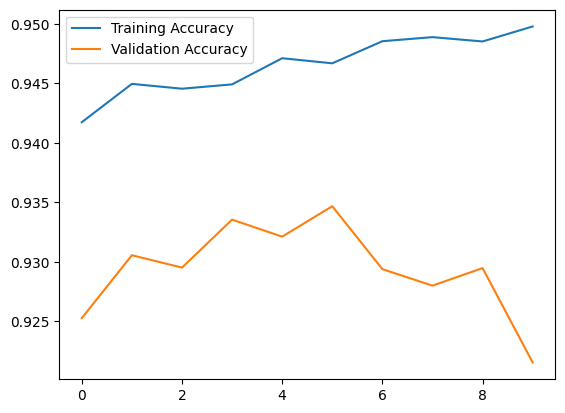

In [22]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [23]:
# keras Format

model.save("models/mnist_model.keras")

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train.reshape(-1, 784), y_train)  # Reshape to flat input
print(f"Logistic Regression Accuracy: {lr.score(X_test.reshape(-1, 784), y_test)}")

Logistic Regression Accuracy: 0.9074891774891775


c:\Users\vedes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
